In [1]:
import numpy as np
import copy

def readlines(filename, read_type="r", encoding="utf-8"):
  tmp_fp = open(filename, read_type, encoding=encoding)
  lines = tmp_fp.readlines()
  tmp_fp.close()

  for i in range(len(lines)):
    lines[i] = lines[i].strip("\n")
    lines[i] = lines[i].strip("\r")
  return lines


logs_lines = readlines("../logs/Shadow_Conv3d_2018-01-24 21:02:12.log")
acc_title = "Shadow_Conv3D Accuracy"
loss_title = "Shadow_Conv3D Loss"
f1_title = "Shadow_Conv3D F1_Score"


In [2]:
train_losses = []
train_accs = []
test_losses = []
test_accs = []
train_f1s = []
test_f1s = []

train_sensitivities = []
train_specificities = []
test_sensitivities = []
test_specificities = []

acc_offset = -0.0
loss_offset = 0.0

for i in range(len(logs_lines)):
    if "[Train] Epoch:" in logs_lines[i]:
        train_line = copy.deepcopy(logs_lines[i])
        test_line = copy.deepcopy(logs_lines[i + 1])
    else:
        continue
    assert "[Train]" in train_line
    assert "[Test]" in test_line

    epoch_idx = train_line.find("Epoch:")
    train_line = train_line[epoch_idx:]
    epoch_idx = test_line.find("Epoch:")
    test_line = test_line[epoch_idx:]

    train_line_array = train_line.split(", ")
    test_line_array = test_line.split(", ")
    assert len(train_line_array) == len(test_line_array) >= 6
    # print(train_line_array)
    train_f1 = float(train_line_array[7][len("F1:"):])
    train_loss = float(train_line_array[5][len("Loss:"):])
    train_tp = int(train_line_array[1][len("TP:"):])
    train_tn = int(train_line_array[2][len("TN:"):])
    train_fp = int(train_line_array[3][len("FP:"):])
    train_fn = int(train_line_array[4][len("FN:"):])
    train_acc = (train_tp + train_tn) / (
        train_tp + train_tn + train_fp + train_fn)
    train_sens = train_tp / (train_tp + train_fn)
    train_spes = train_tn / (train_tn + train_fp)
    train_sensitivities.append(train_sens)
    train_specificities.append(train_spes)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    train_f1s.append(train_f1)
    test_f1 = float(test_line_array[7][len("F1:"):])
    test_loss = float(test_line_array[5][len("Loss:"):]) + loss_offset
    test_tp = int(test_line_array[1][len("TP:"):])
    test_tn = int(test_line_array[2][len("TN:"):])
    test_fp = int(test_line_array[3][len("FP:"):])
    test_fn = int(test_line_array[4][len("FN:"):])
    test_acc = (test_tp + test_tn) / (
        test_tp + test_tn + test_fp + test_fn) + acc_offset
    test_sens = test_tp / (test_tp + test_fn)
    test_spes = test_tn / (test_tn + test_fp)
    test_sensitivities.append(test_sens)
    test_specificities.append(test_spes)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    test_f1s.append(test_f1)
# assert len(train_losses) == len(train_accs) == len(test_losses) == len(test_accs) == 200

print('max train_accs: {:.6f}'.format(np.max(train_accs)))
print('max test_accs: {:.6f}'.format(np.max(test_accs)))

print('max train_f1: {:.6f}'.format(np.max(train_f1s)))
print('max test_f1: {:.6f}'.format(np.max(test_f1s)))

best_epoch = np.argmax(test_accs)
print('train_sensitivities of best_epoch: {:.6f}'.format(
    train_sensitivities[best_epoch]))
print('test_sensitivities of best_epoch: {:.6f}'.format(
    test_sensitivities[best_epoch]))
print('train_specificities of best_epoch: {:.6f}'.format(
    train_specificities[best_epoch]))
print('test_specificities of best_epoch: {:.6f}'.format(
    test_specificities[best_epoch]))

max train_accs: 1.000000
max test_accs: 0.933333
max train_f1: 1.000000
max test_f1: 0.951220
train_sensitivities of best_epoch: 1.000000
test_sensitivities of best_epoch: 0.951220
train_specificities of best_epoch: 1.000000
test_specificities of best_epoch: 0.894737


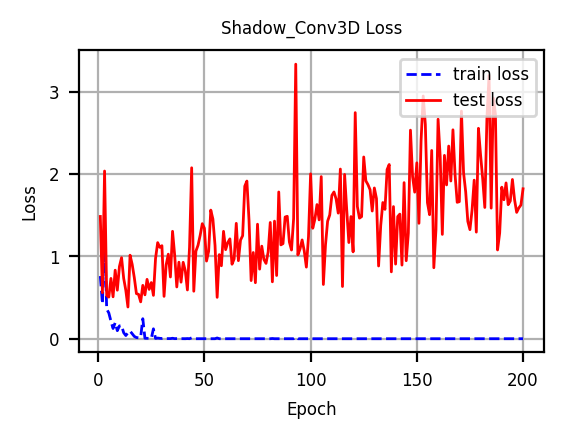

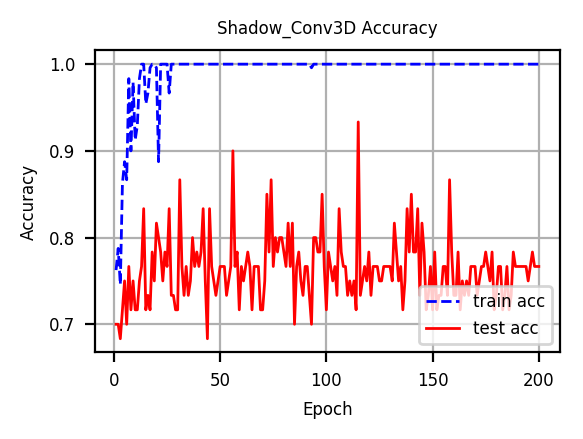

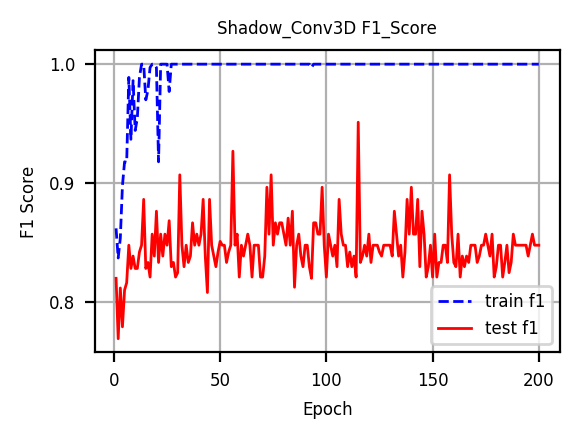

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

train_losses = train_losses[0:200]
train_accs = train_accs[0:200]
train_f1s = train_f1s[0:200]
test_losses = test_losses[0:200]
test_accs = test_accs[0:200]
test_f1s = test_f1s[0:200]
font_size = 6
num_dots = len(train_losses)
fig = plt.figure(figsize=(3, 2), dpi=200)
plt.title(loss_title, fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlabel('Epoch', fontsize=font_size)
plt.ylabel('Loss', fontsize=font_size)
#plt.ylim(0,1)
x = list(range(1, num_dots + 1))
plt.plot(x, train_losses, 'b--', label='train loss', linewidth=1.0)
plt.plot(x, test_losses, 'r', label='test loss', linewidth=1.0)
plt.legend(loc="upper right", fontsize=font_size)
plt.grid()
plt.show()

fig = plt.figure(figsize=(3, 2), dpi=200)
plt.title(acc_title, fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlabel('Epoch', fontsize=font_size)
plt.ylabel('Accuracy', fontsize=font_size)
#plt.ylim(0.8,1.0)
x = list(range(1, num_dots + 1))
plt.plot(x, train_accs, 'b--', label='train acc', linewidth=1.0)
plt.plot(x, test_accs, 'r', label='test acc', linewidth=1.0)
plt.legend(loc="lower right", fontsize=font_size)
plt.grid()
plt.show()

fig = plt.figure(figsize=(3, 2), dpi=200)
plt.title(f1_title, fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.xlabel('Epoch', fontsize=font_size)
plt.ylabel('F1 Score', fontsize=font_size)
#plt.ylim(0.8,1.0)
x = list(range(1, num_dots + 1))
plt.plot(x, train_f1s, 'b--', label='train f1', linewidth=1.0)
plt.plot(x, test_f1s, 'r', label='test f1', linewidth=1.0)
plt.legend(loc="lower right", fontsize=font_size)
plt.grid()
plt.show()